### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [158]:
data = pd.read_csv('data/coupons.csv')

In [160]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [165]:
# Check for null values
data.isnull()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [167]:
# Check for duplicate data
print("Duplicate rows: " + str(data.duplicated().sum()))

Duplicate rows: 74


3. Decide what to do about your missing data -- drop, replace, other...

In [174]:
# Replace null values with 0 and drop duplicates
data = data.fillna(0).drop_duplicates()
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [177]:
# Calculate acceptance rate
yes_count = data['Y'].value_counts()[1]
no_count = data['Y'].value_counts()[0]
accept_proportion = yes_count / (yes_count + no_count)
print("Count of accepted coupons: " + str(yes_count))
print("Count of rejected coupons: " + str(no_count))
print("Proportion of accepted coupons: " + str(accept_proportion))

Count of accepted coupons: 7157
Count of rejected coupons: 5453
Proportion of accepted coupons: 0.5675654242664552


5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

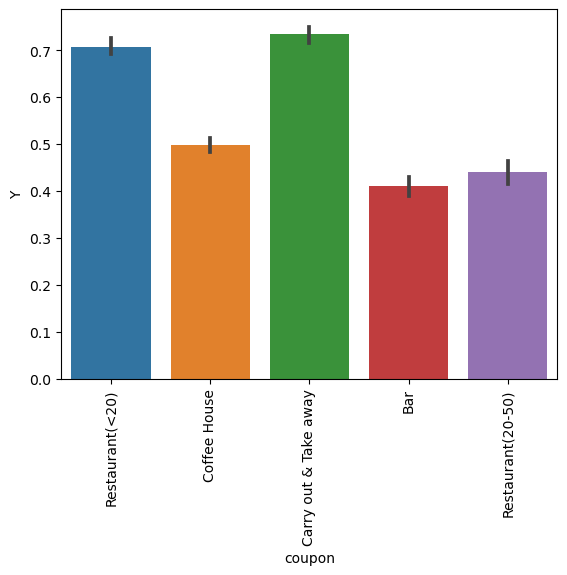

In [180]:
sns.barplot(data, x='coupon', y='Y')
plt.xticks(rotation=90)

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


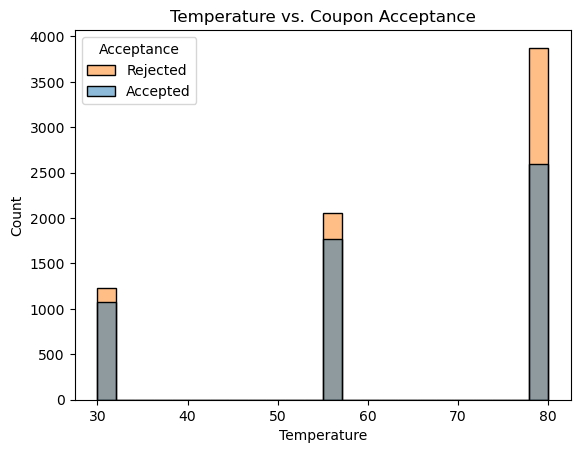

In [249]:
sns.histplot(data=data, x='temperature', hue='Y')
plt.title('Temperature vs. Coupon Acceptance')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend(title='Acceptance', labels=['Rejected', 'Accepted'])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [186]:
# Filter data to coupon type Bar
bar_data = data.query('coupon == "Bar"')
bar_data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [189]:
# Calculate acceptance rate
bar_yes_count = bar_data['Y'].value_counts()[1]
bar_no_count = bar_data['Y'].value_counts()[0]
bar_accept_proportion = bar_yes_count / (bar_yes_count + bar_no_count)
print("Count of accepted bar coupons: " + str(bar_yes_count))
print("Count of rejected bar coupons: " + str(bar_no_count))
print("Proportion of accepted bar coupons: " + str(bar_accept_proportion))

Count of accepted bar coupons: 824
Count of rejected bar coupons: 1186
Proportion of accepted bar coupons: 0.4099502487562189


([<matplotlib.axis.XTick at 0x12c16bcd0>,
 [Text(0, 0, 'Rejected'), Text(1, 0, 'Accepted')])

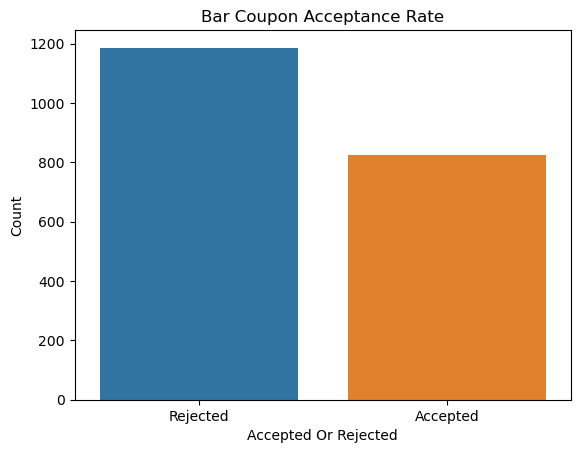

In [251]:
# Visualize acceptance rate
sns.barplot(bar_data, x=bar_data['Y'].value_counts().index, y=bar_data['Y'].value_counts().values)
plt.title('Bar Coupon Acceptance Rate')
plt.xlabel('Accepted Or Rejected')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rejected', 'Accepted'])

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [192]:
# List values of 'Bar' column
bar_values = bar_data['Bar'].unique() 
print("Values of 'Bar' column: " + str(bar_values))

Values of 'Bar' column: ['never' 'less1' '1~3' 'gt8' 0 '4~8']


In [194]:
# Create separate dataframe for those who went to a bar 3 or fewer times a month
bar_3orless_data = bar_data.query('Bar == 0 | Bar == "never" | Bar == "less1" | Bar == "1~3"')
bar_3orless_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [196]:
# Create separate dataframe for those who went to a bar more than 3 times a month
bar_morethan3_data = bar_data.query('Bar == "4~8" | Bar == "gt8"')
bar_morethan3_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
171,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,1,0,1,1
454,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,0
465,Home,Alone,Sunny,55,6PM,Bar,1d,Male,31,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12198,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12199,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12202,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,0,0,1,1
12207,Home,Partner,Sunny,30,10PM,Bar,2h,Female,26,Unmarried partner,...,gt8,1~3,1~3,1~3,1,1,1,0,1,1


In [198]:
# Calculate acceptance rates
bar_3orless_yes_count = bar_3orless_data['Y'].value_counts()[1]
bar_3orless_no_count = bar_3orless_data['Y'].value_counts()[0]
bar_3orless_accept_proportion = bar_3orless_yes_count / (bar_3orless_yes_count + bar_3orless_no_count)
print("Count of accepted bar coupons for those who went to a bar 3 or fewer times in a month: " + str(bar_3orless_yes_count))
print("Count of rejected bar coupons for those who went to a bar 3 or fewer times in a month: " + str(bar_3orless_no_count))
print("Proportion of accepted bar coupons for those who went to a bar 3 or fewer times in a month: " + str(bar_3orless_accept_proportion))

bar_morethan3_yes_count = bar_morethan3_data['Y'].value_counts()[1]
bar_morethan3_no_count = bar_morethan3_data['Y'].value_counts()[0]
bar_morethan3_accept_proportion = bar_morethan3_yes_count / (bar_morethan3_yes_count + bar_morethan3_no_count)
print("Count of accepted bar coupons for those who went to a bar more than 3 times in a month: " + str(bar_morethan3_yes_count))
print("Count of rejected bar coupons for those who went to a bar more than 3 times in a month: " + str(bar_morethan3_no_count))
print("Proportion of accepted bar coupons for those who went to a bar more than 3 times in a month: " + str(bar_morethan3_accept_proportion))

Count of accepted bar coupons for those who went to a bar 3 or fewer times in a month: 671
Count of rejected bar coupons for those who went to a bar 3 or fewer times in a month: 1140
Proportion of accepted bar coupons for those who went to a bar 3 or fewer times in a month: 0.37051352843732743
Count of accepted bar coupons for those who went to a bar more than 3 times in a month: 153
Count of rejected bar coupons for those who went to a bar more than 3 times in a month: 46
Proportion of accepted bar coupons for those who went to a bar more than 3 times in a month: 0.7688442211055276


([<matplotlib.axis.XTick at 0x12b10f850>,
 [Text(0, 0, 'Rejected'), Text(1, 0, 'Accepted')])

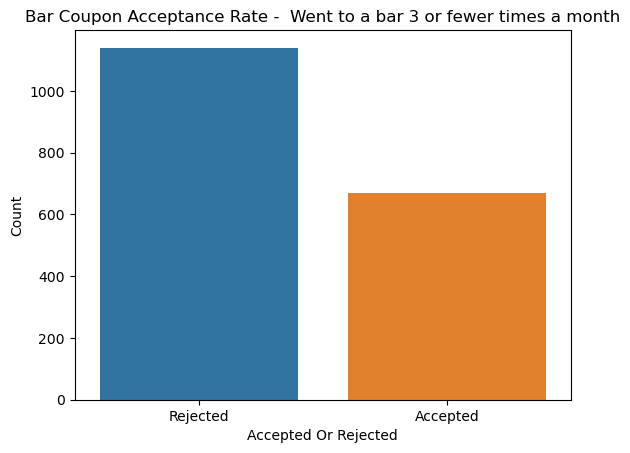

In [253]:
# Visualize acceptance rates
sns.barplot(bar_data, x=bar_3orless_data['Y'].value_counts().index, y=bar_3orless_data['Y'].value_counts().values)
plt.title('Bar Coupon Acceptance Rate -  Went to a bar 3 or fewer times a month')
plt.xlabel('Accepted Or Rejected')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rejected', 'Accepted'])

([<matplotlib.axis.XTick at 0x129996850>,
 [Text(0, 0, 'Rejected'), Text(1, 0, 'Accepted')])

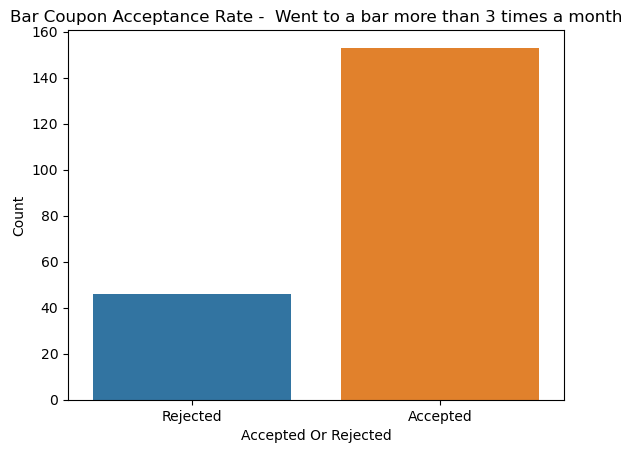

In [255]:
# Visualize acceptance rates
sns.barplot(bar_data, x=bar_morethan3_data['Y'].value_counts().index, y=bar_morethan3_data['Y'].value_counts().values)
plt.title('Bar Coupon Acceptance Rate -  Went to a bar more than 3 times a month')
plt.xlabel('Accepted Or Rejected')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rejected', 'Accepted'])

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [257]:
# List values of 'age' column
age_values = bar_data['age'].unique() 
print("Values of 'age' column: " + str(age_values))

Values of 'age' column: ['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [259]:
# Create separate data frame for those who went to a bar more than once a month and are over the age of 25
bar_morethan1_ageover25_data = bar_data.query('(Bar == "1~3" | Bar == "4~8" | Bar == "gt8") & age != "below21" & age != "21"')
bar_morethan1_ageover25_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
127,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,1,0,1,1
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1


In [261]:
# Create a separate data frame for all others
bar_others4_data = bar_data.query('(Bar != "1~3" & Bar != "4~8" & Bar != "gt8") | (age == "below21" | age == "21")')
bar_others4_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [269]:
# Calculate acceptance rates
bar_morethan1_ageover25_yes_count = bar_morethan1_ageover25_data['Y'].value_counts()[1]
bar_morethan1_ageover25_no_count = bar_morethan1_ageover25_data['Y'].value_counts()[0]
bar_morethan1_ageover25_accept_proportion = bar_morethan1_ageover25_yes_count / (bar_morethan1_ageover25_yes_count + bar_morethan1_ageover25_no_count)
print("Count of accepted bar coupons for those who went to a bar more than once in a month and over age 25: " + str(bar_morethan1_ageover25_yes_count))
print("Count of rejected bar coupons for those who went to a bar more than once in a month and over age 25: " + str(bar_morethan1_ageover25_no_count))
print("Proportion of accepted bar coupons for those who went to a bar more than once in a month and over age 25: " + str(bar_morethan1_ageover25_accept_proportion))

bar_others4_yes_count = bar_others4_data['Y'].value_counts()[1]
bar_others4_no_count = bar_others4_data['Y'].value_counts()[0]
bar_others4_accept_proportion = bar_others4_yes_count / (bar_others4_yes_count + bar_others4_no_count)
print("Count of accepted bar coupons for all others: " + str(bar_others4_yes_count))
print("Count of rejected bar coupons for all others: " + str(bar_others4_no_count))
print("Proportion of accepted bar coupons for all others: " + str(bar_others4_accept_proportion))

Count of accepted bar coupons for those who went to a bar more than once in a month and over age 25: 292
Count of rejected bar coupons for those who went to a bar more than once in a month and over age 25: 128
Proportion of accepted bar coupons for those who went to a bar more than once in a month and over age 25: 0.6952380952380952
Count of accepted bar coupons for all others: 532
Count of rejected bar coupons for all others: 1058
Proportion of accepted bar coupons for all others: 0.33459119496855344


([<matplotlib.axis.XTick at 0x12b0d3290>,
 [Text(0, 0, 'Rejected'), Text(1, 0, 'Accepted')])

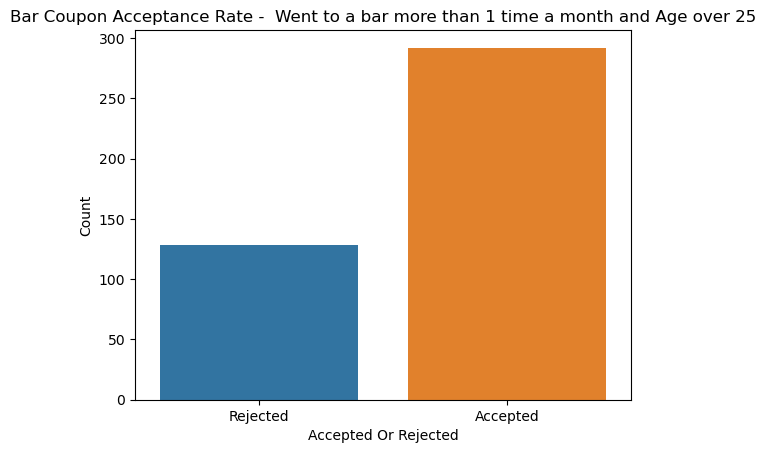

In [263]:
# Visualize acceptance rates
sns.barplot(bar_data, x=bar_morethan1_ageover25_data['Y'].value_counts().index, y=bar_morethan1_ageover25_data['Y'].value_counts().values)
plt.title('Bar Coupon Acceptance Rate -  Went to a bar more than 1 time a month and Age over 25')
plt.xlabel('Accepted Or Rejected')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rejected', 'Accepted'])

([<matplotlib.axis.XTick at 0x12c669f50>,
 [Text(0, 0, 'Rejected'), Text(1, 0, 'Accepted')])

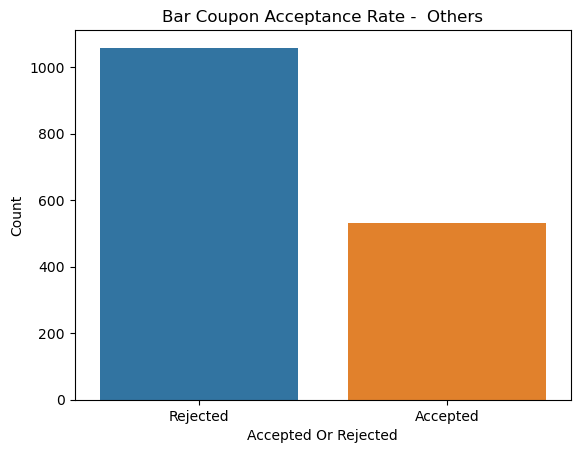

In [265]:
# Visualize acceptance rates
sns.barplot(bar_data, x=bar_others4_data['Y'].value_counts().index, y=bar_others4_data['Y'].value_counts().values)
plt.title('Bar Coupon Acceptance Rate -  Others')
plt.xlabel('Accepted Or Rejected')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rejected', 'Accepted'])

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [218]:
# List values of 'passanger' column
passanger_values = bar_data['passanger'].unique() 
print("Values of 'passanger' column: " + str(passanger_values))

Values of 'passanger' column: ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']


In [220]:
# List values of the 'occupation' column
occupation_values = bar_data['occupation'].unique()
print("Values of 'occupation' column: " + str(occupation_values))

Values of 'occupation' column: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


In [222]:
# Create separate data frame for those who went to a bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
bar_morethan1_nonkidpassengers_notfarmingfishingforestry_data = bar_data.query('(Bar == "1~3" | Bar == "4~8" | Bar == "gt8") & passanger != "Kids(s)" & passanger != "Alone" & occupation != "Farming Fishing & Forestry"')
bar_morethan1_nonkidpassengers_notfarmingfishingforestry_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
224,No Urgent Place,Partner,Sunny,80,10AM,Bar,2h,Female,21,Unmarried partner,...,1~3,1~3,1~3,1~3,1,0,0,0,1,0
227,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Female,21,Unmarried partner,...,1~3,1~3,1~3,1~3,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1


In [228]:
# Create separate data frame for all others
bar_others5_data = bar_data.query('(Bar != "1~3" & Bar != "4~8" & Bar != "gt8") | (passanger == "Kids(s)" | passanger == "Alone") | occupation == "Farming Fishing & Forestry"')
bar_others5_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [267]:
# Calculate acceptance rates
bar_morethan1_nonkidpassengers_notfarmingfishingforestry_yes_count = bar_morethan1_nonkidpassengers_notfarmingfishingforestry_data['Y'].value_counts()[1]
bar_morethan1_nonkidpassengers_notfarmingfishingforestry_no_count = bar_morethan1_nonkidpassengers_notfarmingfishingforestry_data['Y'].value_counts()[0]
bar_morethan1_nonkidpassengers_notfarmingfishingforestry_accept_proportion = bar_morethan1_nonkidpassengers_notfarmingfishingforestry_yes_count / (bar_morethan1_nonkidpassengers_notfarmingfishingforestry_yes_count + bar_morethan1_nonkidpassengers_notfarmingfishingforestry_no_count)
print("Count of accepted bar coupons for those who went to a bar more than once in a month and had non-kid passengers and are not farming/fishing/forestry: " + str(bar_morethan1_nonkidpassengers_notfarmingfishingforestry_yes_count))
print("Count of rejected bar coupons for those who went to a bar more than once in a month and had non-kid passengers and are not farming/fishing/forestry: " + str(bar_morethan1_nonkidpassengers_notfarmingfishingforestry_no_count))
print("Proportion of accepted bar coupons for those who went to a bar more than once in a month and had non-kid passengers and are not farming/fishing/forestry: " + str(bar_morethan1_nonkidpassengers_notfarmingfishingforestry_accept_proportion))

bar_others5_yes_count = bar_others5_data['Y'].value_counts()[1]
bar_others5_no_count = bar_others5_data['Y'].value_counts()[0]
bar_others5_accept_proportion = bar_others5_yes_count / (bar_others5_yes_count + bar_others5_no_count)
print("Count of accepted bar coupons for all others: " + str(bar_others5_yes_count))
print("Count of rejected bar coupons for all others: " + str(bar_others5_no_count))
print("Proportion of accepted bar coupons for all others: " + str(bar_others5_accept_proportion))

Count of accepted bar coupons for those who went to a bar more than once in a month and had non-kid passengers and are not farming/fishing/forestry: 157
Count of rejected bar coupons for those who went to a bar more than once in a month and had non-kid passengers and are not farming/fishing/forestry: 83
Proportion of accepted bar coupons for those who went to a bar more than once in a month and had non-kid passengers and are not farming/fishing/forestry: 0.6541666666666667
Count of accepted bar coupons for all others: 667
Count of rejected bar coupons for all others: 1103
Proportion of accepted bar coupons for all others: 0.3768361581920904


([<matplotlib.axis.XTick at 0x12c6b8f90>,
 [Text(0, 0, 'Rejected'), Text(1, 0, 'Accepted')])

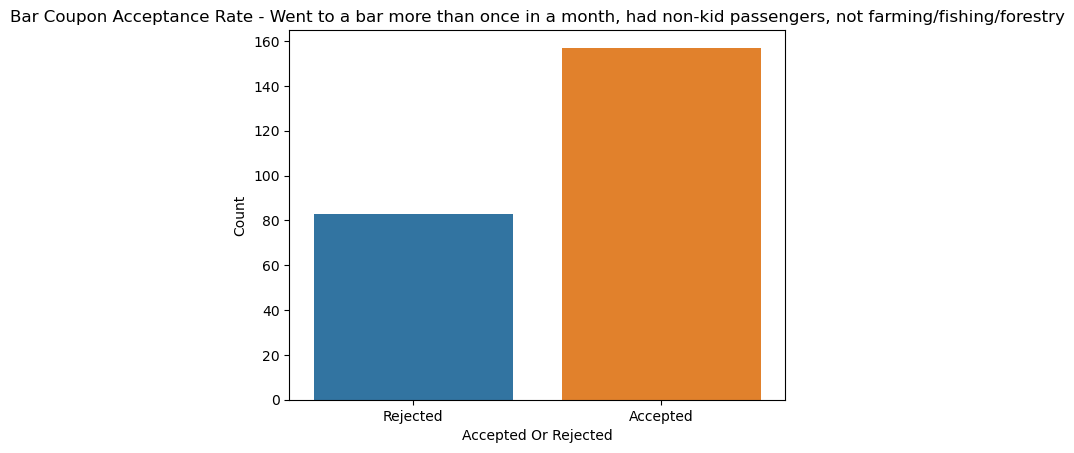

In [273]:
# Visualize acceptance rates
sns.barplot(bar_data, x=bar_morethan1_nonkidpassengers_notfarmingfishingforestry_data['Y'].value_counts().index, y=bar_morethan1_nonkidpassengers_notfarmingfishingforestry_data['Y'].value_counts().values)
plt.title('Bar Coupon Acceptance Rate - Went to a bar more than once in a month, had non-kid passengers, not farming/fishing/forestry')
plt.xlabel('Accepted Or Rejected')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rejected', 'Accepted'])

([<matplotlib.axis.XTick at 0x12c773410>,
 [Text(0, 0, 'Rejected'), Text(1, 0, 'Accepted')])

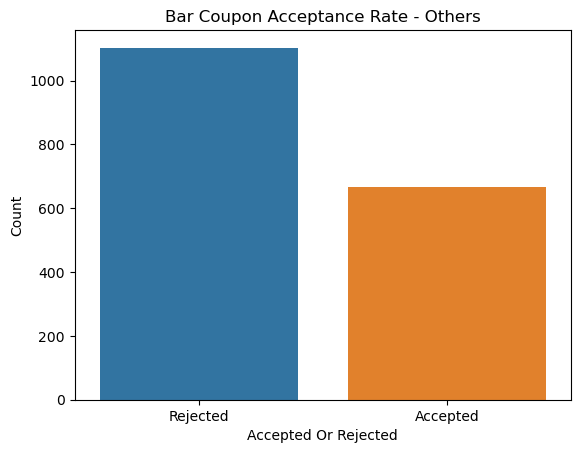

In [275]:
# Visualize acceptance rates
sns.barplot(bar_data, x=bar_others5_data['Y'].value_counts().index, y=bar_others5_data['Y'].value_counts().values)
plt.title('Bar Coupon Acceptance Rate - Others')
plt.xlabel('Accepted Or Rejected')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rejected', 'Accepted'])

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [277]:
# List values of 'maritalStatus' column
maritalStatus_values = bar_data['maritalStatus'].unique() 
print("Values of 'maritalStatus' column: " + str(maritalStatus_values))

Values of 'maritalStatus' column: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']


In [279]:
# List values of 'RestaurantLessThan20' column
restaurantLessThan20_values = bar_data['RestaurantLessThan20'].unique() 
print("Values of 'RestaurantLessThan20' column: " + str(restaurantLessThan20_values))

Values of 'RestaurantLessThan20' column: ['4~8' '1~3' 'less1' 'gt8' 0 'never']


In [281]:
# List values of 'income' column
income_values = bar_data['income'].unique() 
print("Values of 'income' column: " + str(income_values))

Values of 'income' column: ['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [283]:
# Create separate dataframe for: go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_morethan1_nonkidpassengers_notwidowed_data = bar_data.query('(Bar == "1~3" | Bar == "4~8" | Bar == "gt8") & passanger != "Kids(s)" & passanger != "Alone" & maritalStatus != "Widowed"')
bar_morethan1_nonkidpassengers_notwidowed_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
224,No Urgent Place,Partner,Sunny,80,10AM,Bar,2h,Female,21,Unmarried partner,...,1~3,1~3,1~3,1~3,1,0,0,0,1,0
227,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Female,21,Unmarried partner,...,1~3,1~3,1~3,1~3,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12481,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1


In [285]:
# Create separate dataframe for: go to bars more than once a month and under the age of 30
bar_morethan1_ageunder30_data = bar_data.query('(Bar == "1~3" | Bar == "4~8" | Bar == "gt8") & (age == "21" | age == "26" | age == "below21")')
bar_morethan1_ageunder30_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,1,0,1,0
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,1,0,1,0
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0


In [287]:
# Create separate dataframe for: go to cheap restaurants more than 4 times a month and income is less than 50K
bar_cheaprestaurantsmorethan4_incomeunder50k_data = bar_data.query('(RestaurantLessThan20 == "4~8" | RestaurantLessThan20 == "gt8") & (income == "Less than $12500" | income == "$12500 - $24999" | income == "$25000 - $37499" | income == "$37500 - $49999")')
bar_cheaprestaurantsmorethan4_incomeunder50k_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
156,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,0,1,1
167,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12368,Work,Alone,Snowy,30,7AM,Bar,1d,Female,31,Single,...,4~8,less1,4~8,1~3,1,1,1,0,1,0
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0


In [289]:
# Calculate acceptance rates
bar_morethan1_nonkidpassengers_notwidowed_yes_count = bar_morethan1_nonkidpassengers_notwidowed_data['Y'].value_counts()[1]
bar_morethan1_nonkidpassengers_notwidowed_no_count = bar_morethan1_nonkidpassengers_notwidowed_data['Y'].value_counts()[0]
bar_morethan1_nonkidpassengers_notwidowed_accept_proportion = bar_morethan1_nonkidpassengers_notwidowed_yes_count / (bar_morethan1_nonkidpassengers_notwidowed_yes_count + bar_morethan1_nonkidpassengers_notwidowed_no_count)
print("Count of accepted bar coupons for those who went to a bar more than once in a month and had non-kid passengers and are not widowed: " + str(bar_morethan1_nonkidpassengers_notwidowed_yes_count))
print("Count of rejected bar coupons for those who went to a bar more than once in a month and had non-kid passengers and are not widowed: " + str(bar_morethan1_nonkidpassengers_notwidowed_no_count))
print("Proportion of accepted bar coupons for those who went to a bar more than once in a month and had non-kid passengers and are not widowed: " + str(bar_morethan1_nonkidpassengers_notwidowed_accept_proportion))

bar_morethan1_ageunder30_yes_count = bar_morethan1_ageunder30_data['Y'].value_counts()[1]
bar_morethan1_ageunder30_no_count = bar_morethan1_ageunder30_data['Y'].value_counts()[0]
bar_morethan1_ageunder30_accept_proportion = bar_morethan1_ageunder30_yes_count / (bar_morethan1_ageunder30_yes_count + bar_morethan1_ageunder30_no_count)
print("Count of accepted bar coupons for those who went to a bar more than once in a month and age under 30: " + str(bar_morethan1_ageunder30_yes_count))
print("Count of rejected bar coupons for those who went to a bar more than once in a month and age under 30: " + str(bar_morethan1_ageunder30_no_count))
print("Proportion of accepted bar coupons for those who went to a bar more than once in a month and age under 30: " + str(bar_morethan1_ageunder30_accept_proportion))

bar_cheaprestaurantsmorethan4_incomeunder50k_yes_count = bar_cheaprestaurantsmorethan4_incomeunder50k_data['Y'].value_counts()[1]
bar_cheaprestaurantsmorethan4_incomeunder50k_no_count = bar_cheaprestaurantsmorethan4_incomeunder50k_data['Y'].value_counts()[0]
bar_cheaprestaurantsmorethan4_incomeunder50k_accept_proportion = bar_cheaprestaurantsmorethan4_incomeunder50k_yes_count / (bar_cheaprestaurantsmorethan4_incomeunder50k_yes_count + bar_cheaprestaurantsmorethan4_incomeunder50k_no_count)
print("Count of accepted bar coupons for those who went to cheap restaurants more than 4 times in a month and income under $50K: " + str(bar_cheaprestaurantsmorethan4_incomeunder50k_yes_count))
print("Count of rejected bar coupons for those who went to cheap restaurants more than 4 times in a month and income under $50K: " + str(bar_cheaprestaurantsmorethan4_incomeunder50k_no_count))
print("Proportion of accepted bar coupons for those who went to cheap restaurants more than 4 times in a month and income under $50K: " + str(bar_cheaprestaurantsmorethan4_incomeunder50k_accept_proportion))

Count of accepted bar coupons for those who went to a bar more than once in a month and had non-kid passengers and are not widowed: 157
Count of rejected bar coupons for those who went to a bar more than once in a month and had non-kid passengers and are not widowed: 83
Proportion of accepted bar coupons for those who went to a bar more than once in a month and had non-kid passengers and are not widowed: 0.6541666666666667
Count of accepted bar coupons for those who went to a bar more than once in a month and age under 30: 249
Count of rejected bar coupons for those who went to a bar more than once in a month and age under 30: 96
Proportion of accepted bar coupons for those who went to a bar more than once in a month and age under 30: 0.7217391304347827
Count of accepted bar coupons for those who went to cheap restaurants more than 4 times in a month and income under $50K: 156
Count of rejected bar coupons for those who went to cheap restaurants more than 4 times in a month and income 

([<matplotlib.axis.XTick at 0x12c76b410>,
 [Text(0, 0, 'Rejected'), Text(1, 0, 'Accepted')])

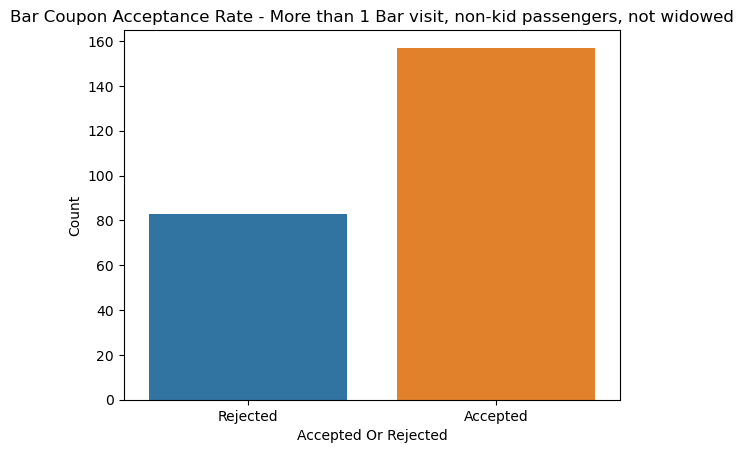

In [291]:
# Visualize acceptance rates
sns.barplot(bar_data, x=bar_morethan1_nonkidpassengers_notwidowed_data['Y'].value_counts().index, y=bar_morethan1_nonkidpassengers_notwidowed_data['Y'].value_counts().values)
plt.title('Bar Coupon Acceptance Rate - More than 1 Bar visit, non-kid passengers, not widowed')
plt.xlabel('Accepted Or Rejected')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rejected', 'Accepted'])

([<matplotlib.axis.XTick at 0x12c87ef50>,
 [Text(0, 0, 'Rejected'), Text(1, 0, 'Accepted')])

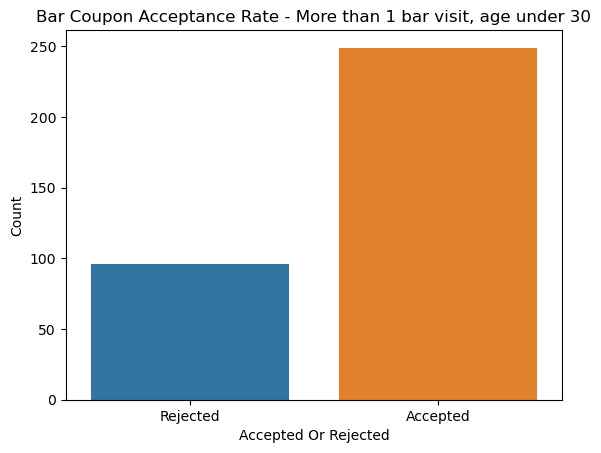

In [293]:
# Visualize acceptance rates
sns.barplot(bar_data, x=bar_morethan1_ageunder30_data['Y'].value_counts().index, y=bar_morethan1_ageunder30_data['Y'].value_counts().values)
plt.title('Bar Coupon Acceptance Rate - More than 1 bar visit, age under 30')
plt.xlabel('Accepted Or Rejected')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rejected', 'Accepted'])

([<matplotlib.axis.XTick at 0x12c8c1f90>,
 [Text(0, 0, 'Rejected'), Text(1, 0, 'Accepted')])

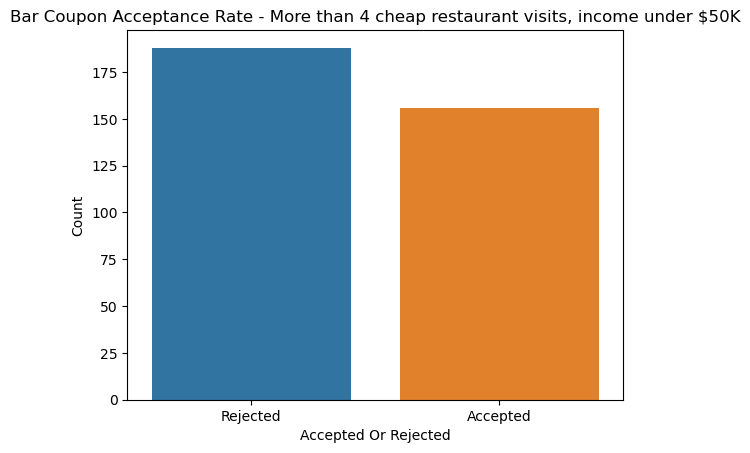

In [295]:
# Visualize acceptance rates
sns.barplot(bar_data, x=bar_cheaprestaurantsmorethan4_incomeunder50k_data['Y'].value_counts().index, y=bar_cheaprestaurantsmorethan4_incomeunder50k_data['Y'].value_counts().values)
plt.title('Bar Coupon Acceptance Rate - More than 4 cheap restaurant visits, income under $50K')
plt.xlabel('Accepted Or Rejected')
plt.ylabel('Count')
plt.xticks([0, 1], ['Rejected', 'Accepted'])

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Based on these observations, the following qualities lead to higher acceptance rates of Bar coupons:
- More than 1 bar visit in a month
- Age under 30
- Having passengers who are not kids
- Not widowed
- Income over $50K
- Occupations other than farming, fishing, or forestry

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  